**Table of contents**<a id='toc0_'></a>    
- [Import Statements](#toc1_1_)    
- [Getting started](#toc2_)    
  - [*Initial exploration*](#toc2_1_)    
- [Data cleaning and Imputation](#toc3_)    
  - [*Handling missing values*](#toc3_1_)    
- [Data validation](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=5
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_'></a>[Import Statements](#toc0_)

In [14]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## <a id='toc2_'></a>[Getting started](#toc0_)

### <a id='toc2_1_'></a>[*Initial exploration*](#toc0_)

- Take a quick look at the data with `.head()`

- Take a look at some other informations about the dataframe with `.info()`, `.shape`, `.dtypes()`, `.columns` etc.

- For categorical variables, a common question we might ask ourselves is how many data points do we have for each of the category? This can be done with `.value_counts()`.

- Get a quick overview of the numerical variables with `.describe()`.

- To see how the numerical variables are distributed use a `histogram/kdeplot/boxplot/violinplot/boxenplot`. After you've got a good grip about what the data is about, you can use `jointplot/pairplot` to further understand the relationship between the variables.

In [15]:
unemployment = pd.read_csv("../datasets/clean_unemployment.csv")

In [16]:
unemployment.head()

,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90


In [17]:
unemployment.shape

(182, 15)

In [18]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  182 non-null    object 
 1   country_name  182 non-null    object 
 2   continent     177 non-null    object 
 3   2010          182 non-null    float64
 4   2011          182 non-null    float64
 5   2012          182 non-null    float64
 6   2013          182 non-null    float64
 7   2014          182 non-null    float64
 8   2015          182 non-null    float64
 9   2016          182 non-null    float64
 10  2017          182 non-null    float64
 11  2018          182 non-null    float64
 12  2019          182 non-null    float64
 13  2020          182 non-null    float64
 14  2021          182 non-null    float64
dtypes: float64(12), object(3)
memory usage: 21.5+ KB


In [19]:
unemployment.continent.value_counts()

continent
Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
Name: count, dtype: int64

In [20]:
unemployment.describe()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,8.409286,8.315440,8.317967,8.344780,8.179670,8.058901,7.925879,7.668626,7.426429,7.243736,8.420934,8.390879
std,6.248887,6.266795,6.367270,6.416041,6.284241,6.161170,6.045439,5.902152,5.818915,5.696573,6.040915,6.067192
min,0.450000,0.320000,0.480000,0.250000,0.200000,0.170000,0.150000,0.140000,0.110000,0.100000,0.210000,0.260000
25%,4.015000,3.775000,3.742500,3.692500,3.625000,3.662500,3.800000,3.690000,3.625000,3.487500,4.285000,4.335000
50%,6.965000,6.805000,6.690000,6.395000,6.450000,6.170000,5.925000,5.650000,5.375000,5.240000,6.695000,6.425000
75%,10.957500,11.045000,11.285000,11.310000,10.695000,10.215000,10.245000,10.315000,9.257500,9.445000,11.155000,10.840000
max,32.020000,31.380000,31.020000,29.000000,28.030000,27.690000,26.540000,27.040000,26.910000,28.470000,29.220000,33.560000


For quick plotting you can use pandas plotting functions like `df.plot(kind='hist')` or `df.plot(kind='box')`. For more advanced plotting, you can use `matplotlib` or `seaborn`.

<Axes: xlabel='2021', ylabel='Count'>

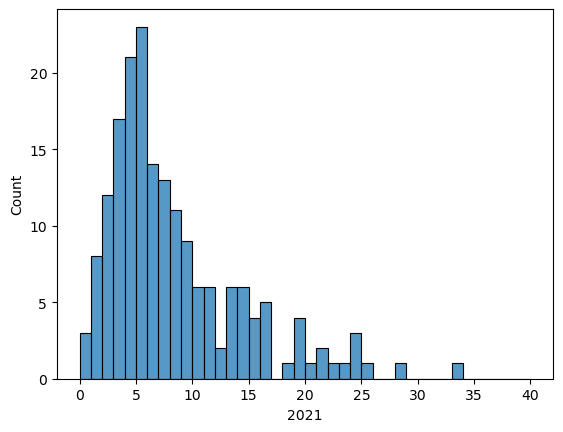

In [21]:
sns.histplot(data=unemployment, x="2021", binrange=(0, 40), binwidth=1)

## <a id='toc3_'></a>[Data cleaning and Imputation](#toc0_)

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. And, Imputation is the process of replacing missing data with substituted values.

### <a id='toc3_1_'></a>[*Handling missing values*](#toc0_)

- Use `<ser|df>.isna().sum()` to see how many rows have missing values. Use `<ser|df>.isna().mean()` to see the proportion of missing values in each column. To convert to percentage, multiply by 100 i.e, `.isna().mean().mul(100)`.

- Strategies for handling missing data
  - Drop the rows with missing values using `<ser|df>.dropna()` if 5% or less of the total observations are missing.
  - Impute the missing values with `mean/median/mode` (depending on the distribution and context) using `<ser|df>.fillna()`.
  - Also we can impute the missing values by sub-groups if the trend of the data varies between certain groups.

In [22]:
planes = pd.read_csv("../datasets/planes.csv")

In [23]:
planes.shape

(10660, 11)

In [24]:
planes.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [25]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


In [26]:
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 916.2+ KB


In [27]:
planes.isna().sum()

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64

In [28]:
# we will remove the rows from a column if it has <= 5% of the total rows missing
threshold = len(planes) * 0.05
subset_of_columns_to_remove_rows_from = planes.columns[planes.isna().sum() <= threshold]

In [29]:
planes = planes.dropna(subset=subset_of_columns_to_remove_rows_from)

In [30]:
planes.isna().sum()

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64

In [31]:
# The Additional_Info column is of object type. Let's first explore the values and their frequencies in the col
planes["Additional_Info"].value_counts()

Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [32]:
# From what we can see the Additional_Info column doesn't contain much useful information. 
# Around 6400 rows has No info/No Info as the provided information
# So we should just drop the Additional_Info column altogether
planes = planes.drop(columns="Additional_Info")

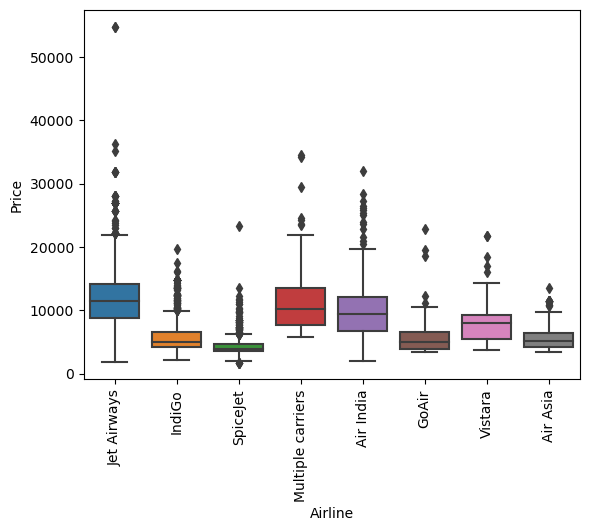

In [33]:
# Let's explore the Price column now.
# It's float64 type. Plotting it's distribution might be helpful.
# Also, the distribution of the price of the tickets are most likely to vary depending on the Airlines.
# We chose to plot a boxplot since it provides 5 summary statistics and also identifies the outliers nicely.
ax = sns.boxplot(data=planes, x="Airline", y="Price")
ax.tick_params("x", rotation=90)

In [34]:
# From the boxplot we can see that indeed the ticket prices vary widely between Airlines and also there are lots
# of outliers for each Airline. If we use mean to impute the missing values then it would not represent the 
# dataset accurately. We should instead use median.
fill_values = planes.groupby("Airline").Price.agg("median").to_dict()
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(fill_values))

In [35]:
planes.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

In [36]:
# We could've also used, 
# planes = planes.assign(Price=planes.groupby("Airline").Price.transform(lambda grp: grp.fillna(grp.median())))

## <a id='toc4_'></a>[Data validation](#toc0_)

Data validation is the process of ensuring that the data is clean, correct and useful. It is a good practice to validate the data before you start working on it. This will save you a lot of time and effort in the long run.

- Check the datatypes with `.dtypes` and make sure they are correct. If not, convert them to the correct datatype with `.astype()`.

- For validating categorical variables: to confirm that the categories are as expected use `.unique()` or `.value_counts()`. We can also use `.isin()` to check if the values are in a list of expected values. This can also be used as a filter. We can also use the `~` operator to negate the logic of the filter.

- For validating numerical variables: use `.describe()` to get the summary statistics in a tabular format. We can also draw a `boxplot` to see the summary statistics visually. To select only the numeric columns of a dataframe use, `.select_dtypes("number")`.

<Axes: xlabel='2021', ylabel='continent'>

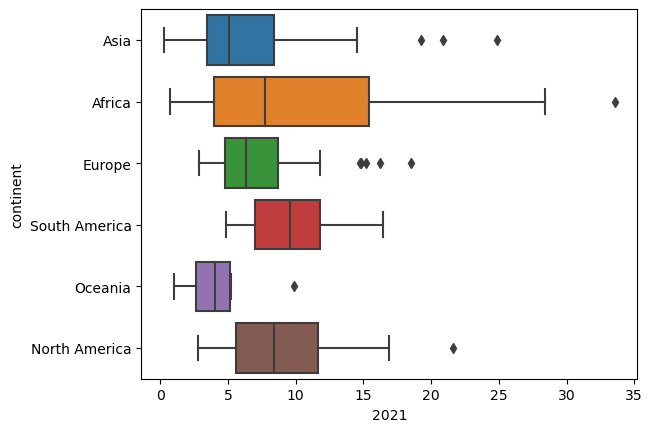

In [37]:
sns.boxplot(data=unemployment, x="2021", y="continent")